<a href="https://colab.research.google.com/github/adibhosn/Machine_learning_lab/blob/main/k_means_monitoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means
é um dos métodos de aprendizado de máquina não supervisionado mais populares para agrupamento de dados. Ele é utilizado para dividir um conjunto de dados em K clusters, onde cada ponto pertence ao cluster com o centroide mais próximo.

# Exemplos do mundo real

No Netflix, o K-Means agrupa usuários com hábitos de visualização parecidos, recomendando filmes populares dentro do grupo.

No Spotify, o algoritmo agrupa músicas com características semelhantes (gênero, ritmo), sugerindo faixas dentro do estilo preferido do usuário.

# Conceitos

**1-Centroide**

Primeiro fator a ser explicado, é o centroide é o ponto central de um cluster, representando a média das coordenadas de todos os pontos dentro dele. No K-Means, os centroides são recalculados a cada iteração até que os grupos se estabilizem.

---
**2-Calculo Distância Euclidiana**

A distância euclidiana mede a proximidade entre dois pontos no espaço. No K-Means, é usada para determinar a qual centroide um ponto pertence.

---
**3-Média**

A média é sada para recalcular o centroide em cada iteração do K-Means. Após atribuir os pontos aos clusters, calcula-se a média das coordenadas de todos os pontos do cluster para definir a nova posição do centroide.

---
**4-Definição de Grupos**
Os grupos no K-Means são definidos iterativamente: os pontos são atribuídos ao centroide mais próximo, e os centroides são recalculados como a média dos pontos do grupo. Esse processo se repete até a convergência, formando clusters baseados na menor distância entre os pontos e seus respectivos centroides.

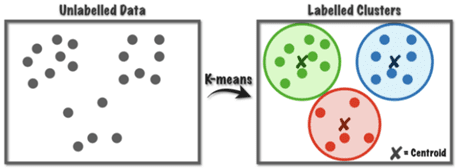

# Elbow Method
O Elbow Method é importante no K-Means porque ajuda a escolher o número ideal de clusters (K) de maneira objetiva. Evita problemas como overfitting (muitos clusters) e underfitting (poucos clusters), além de analisar a soma das distâncias dos pontos aos seus centroides (WSS) para diferentes valores de K.

O ponto onde a curva do gráfico forma um "cotovelo" indica o melhor K, equilibrando precisão e simplicidade. Isso evita clusters em excesso ou insuficientes, melhorando o desempenho do modelo.

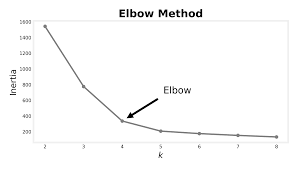

# Explicando dataset utilizado

O Dataset Iris é um dos conjuntos de dados mais famosos e amplamente utilizados em aprendizado de máquina. Ele contém medições de 150 flores de íris de três espécies diferentes: Setosa, Versicolor e Virginica. Cada amostra tem quatro características:

Comprimento da sépala

Largura da sépala

Comprimento da pétala

Largura da pétala

Essas medições são usadas para distinguir as diferentes espécies de íris, mas no contexto de clustering, o objetivo é agrupar as flores com base em suas características, sem conhecer a espécie previamente. O K-Means, sendo um algoritmo de clustering, ajudará a identificar esses agrupamentos.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.patches as mpatches
import pandas as pd

In [39]:
data = load_iris()
X = data.data
y = data.target  # Rótulos reais das espécies
species_names = data.target_names  # Nomes das espécies

In [40]:
# Normalizando os dados, pois o algoritimo é sensível a dados com escalas diferentes(paramétrico), pois lida com distância
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

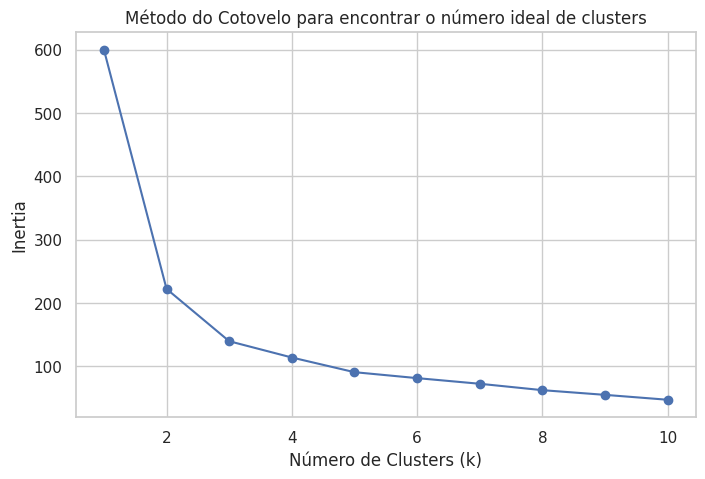

In [41]:
# Encontrando o número ideal de clusters (Elbow Method)
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inertia")
plt.title("Método do Cotovelo para encontrar o número ideal de clusters")
plt.show()

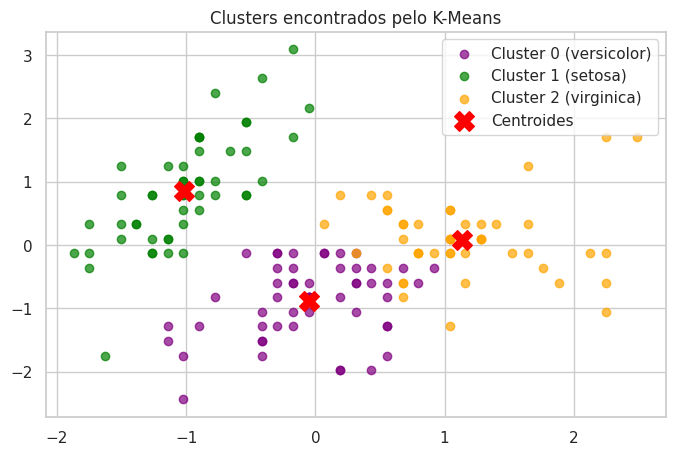

In [42]:
# Treinando o modelo K-Means com o número ideal de clusters (k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Mapeando cada cluster para a classe mais frequente
cluster_labels = {}
for i in range(3):  # Para cada cluster encontrado
    mask = (clusters == i)
    most_common_label = np.bincount(y[mask]).argmax()  # Classe mais frequente dentro do cluster
    cluster_labels[i] = species_names[most_common_label]  # Associa cluster à classe real

# Criando cores distintas para cada cluster
colors = ['purple', 'green', 'orange']
plt.figure(figsize=(8, 5))

# Plotando os pontos do dataset com cores baseadas no cluster
for i, color in enumerate(colors):
    plt.scatter(X_scaled[clusters == i, 0], X_scaled[clusters == i, 1],
                c=color, label=f"Cluster {i} ({cluster_labels[i]})", alpha=0.7)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='X', s=200, color='red', label="Centroides")

plt.title("Clusters encontrados pelo K-Means")
plt.legend()
plt.show()
